# Practice: Examine the diamonds datase

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds.head() # notice shape, unit, key, etc...

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 1. My turn: lets do the usual immediate explorations including the categorical vars

In [3]:
# my turn: lets do the usual immediate explorations including the categorical vars
diamonds.head()
diamonds.nunique()
diamonds.count
diamonds.info()
diamonds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 2. My turn: explore carats - how many are 0.99 vs 1 carat? why?

In [4]:
# my turn: explore carats - how many are 0.99 vs 1 carat? why?
print(len(diamonds.query("carat == 0.99")))
print(len(diamonds.query("carat == 1")))

23
1558


### 3. Explore dist of x, y, z: what did you learn? which is width, length, depth?

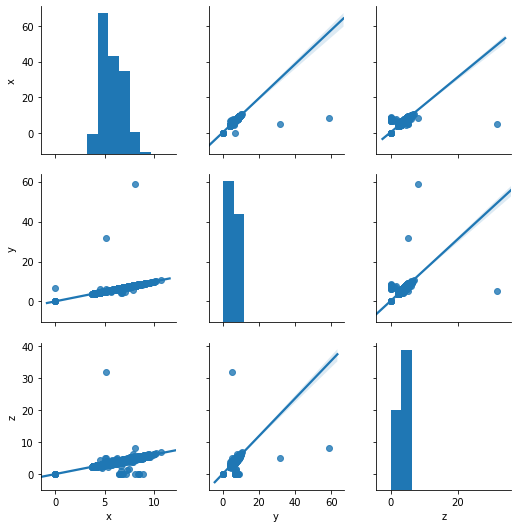

In [5]:
# explore dist of x, y, z: what did you learn? which is width, length, depth?
sns.pairplot(diamonds[['x','y','z']],kind='reg')


### 4. Your turn: explore price - is there anything unusual? (HINT: try many bin widths)

AxesSubplot(0.125,0.125;0.775x0.755)


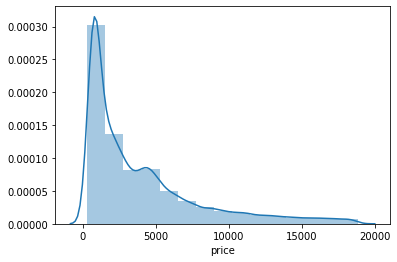

In [6]:
# your turn: explore price - is there anything unusual? (HINT: try many bin widths)
diamonds['price'].describe()
print(sns.distplot(diamonds['price'],kde=True, bins=15))


AxesSubplot(0.125,0.125;0.775x0.755)


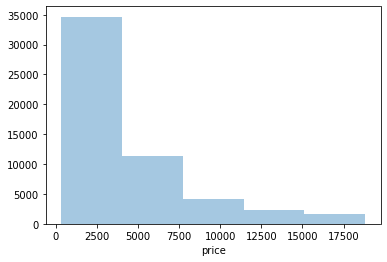

In [7]:
print(sns.distplot(diamonds['price'], kde=False, bins=5))

### 5. My turn: how is carat related to price?

AxesSubplot(0.125,0.125;0.775x0.755)


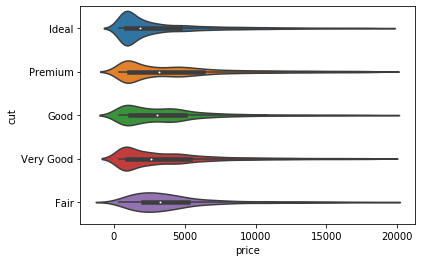

In [8]:
# my turn: how is carat related to price?
print(sns.violinplot(x="price", y="cut", data=diamonds))

### 6. Your turn: how is price related to cut?

AxesSubplot(0.125,0.125;0.775x0.755)


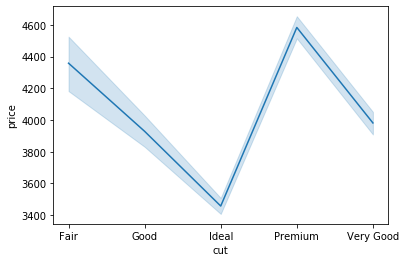

In [9]:
# your turn: how is price related to cut?
print(sns.lineplot(x="cut", y="price", data=diamonds))

### 7. How should we deal with outliers? delete obs? replace with nan? winsorize? show each...# Use z-score formula to calculate the z-scores

In [10]:
# how should we deal with outliers? delete obs? replace with nan? winsorize? show each...
diamonds_drop=diamonds.drop(['carat','cut','color','clarity','depth',
                             'table','x','y','z'],axis=1)

In [11]:
# Use z-score formula to calculate the z-scores

z = (diamonds_drop- diamonds_drop.mean())/diamonds_drop.std()


#Assign a threshold = 3, anything over this. threshold is an outlier 
outliers=np.where(z > 3)


#Returns numpy arrays, returns arrays 1 and 2 for the dataframe outliers
with np.printoptions(threshold = np.inf):

    
#Use Unique Counts to get the amount of frequencies of the columns in array 1 
    unique, counts = np.unique(outliers[1], return_counts=True)
    dic = dict(zip(unique, counts))
    print(dic)                   #prints out the frequency per column 
    val = list(dic.values())    #create a dataframe that contains a list for the frequences
    val.sort()                  #sorts the frequency from lowest to highest
    first = val[-1]             #indexes for the highest value
    
#returns the whole list with frequncies but also returns which colouns has the highest and second
#highest frequencies

    max_key = list(dic.keys())[list(dic.values()).index(first)]      
    print(max_key) 


    #Names of max value/column
    print(diamonds_drop.iloc[ : , max_key].name)         #gives the name of the highest frequency column    
 

{0: 1206}
0
price
